## Regression assignment - addiction analysis

### Using lightgbm algorithm, The experimental results of the ensemble model will be compared with the results of a single model.

### lightgbm algorithm : The existing Boosting models used a level-wise increase of the tree, but the lightgbm model used a leaf-wise tree segmentation.

* Feature of lightgbm model


| lightgbm |
|:---:|
| large amount data processing is possible|
|Use fewer memory than other models|
|GPU support|
|Overfitting problem occurs when using too few data||
![image](https://user-images.githubusercontent.com/56014940/83352030-aa371000-a383-11ea-80af-422f18f2bb24.png)

### GradientBoosting hyperparameters
>- criterion : loss function metric
>- learning rate: pruning or set number of tree.
> - n_estimators : Number of tree

### Lightgbm hyperparameters
> - n_estimators : Number of tree
> - learning_rate : learning rate
> - max_depth : Maximum depth of tree
> - min_child_samples : Number of minimum data sample to get leaf node
> - num_leaves : Number of maximun leaf each of one tree
> - feature_fraction : ratio of feature during training tree
> - reg_lambda : L2 regularization
> - reg_alpha : L1 regularization
> - objective : choose task {regression, binary, lambdarank, multiclass}
> - metric : choose loss function. {mae, mse, rmse, huber, fair, poisson, ..., etc}
> - is_training_metric : set this to true if need to output metric result of training
> - bagging_fraction : random select part of data
> - bagging_freq : perform bagging at every k iteration
> - seed : set random seed.

### Data analysis

#### Raw data

In [185]:
#!pip install lightgbm

In [186]:
import numpy as np
import pandas as pd
data = pd.read_csv("compresive_strength_concrete.csv")
data.columns = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate',
                'Age', 'Concrete_compressive_strength']

x, y = data.iloc[:,0:-1], data.iloc[:,-1]
print(x.shape, y.shape)

(1030, 8) (1030,)


In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=142)

In [188]:
import lightgbm as lgb
train_ds = lgb.Dataset(x_train, label = y_train) 
test_ds = lgb.Dataset(x_test, label = y_test) 

In [189]:
params = {'n_estimators' : 10000,
          'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [190]:
import time
lgb_start = time.time()
model = lgb.train(params, train_ds, 10000, test_ds, verbose_eval=100, early_stopping_rounds=100)

print("lightgbm model time : ", time.time() - lgb_start)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 100.716
[200]	valid_0's l2: 51.7065
[300]	valid_0's l2: 35.5507


D:\anaconda\envs\opencv\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[400]	valid_0's l2: 28.4917
[500]	valid_0's l2: 24.8851
[600]	valid_0's l2: 22.7309
[700]	valid_0's l2: 21.1838
[800]	valid_0's l2: 20.329
[900]	valid_0's l2: 19.729
[1000]	valid_0's l2: 19.0856
[1100]	valid_0's l2: 18.5336
[1200]	valid_0's l2: 18.2099
[1300]	valid_0's l2: 17.8025
[1400]	valid_0's l2: 17.6124
[1500]	valid_0's l2: 17.3306
[1600]	valid_0's l2: 17.1196
[1700]	valid_0's l2: 16.9431
[1800]	valid_0's l2: 16.8949
[1900]	valid_0's l2: 16.7486
[2000]	valid_0's l2: 16.5714
[2100]	valid_0's l2: 16.4749
[2200]	valid_0's l2: 16.4663
[2300]	valid_0's l2: 16.3376
[2400]	valid_0's l2: 16.2555
[2500]	valid_0's l2: 16.1727
[2600]	valid_0's l2: 16.0945
[2700]	valid_0's l2: 16.0337
[2800]	valid_0's l2: 15.9634
[2900]	valid_0's l2: 15.89
[3000]	valid_0's l2: 15.8684
[3100]	valid_0's l2: 15.7924
[3200]	valid_0's l2: 15.7751
[3300]	valid_0's l2: 15.7788
Early stopping, best iteration is:
[3210]	valid_0's l2: 15.7588
lightgbm model time :  2.0410003662109375


### Feature importance

* Lightgbm also can extract feature importance
* lightgbm.plot_importance module output : feature importance about during training

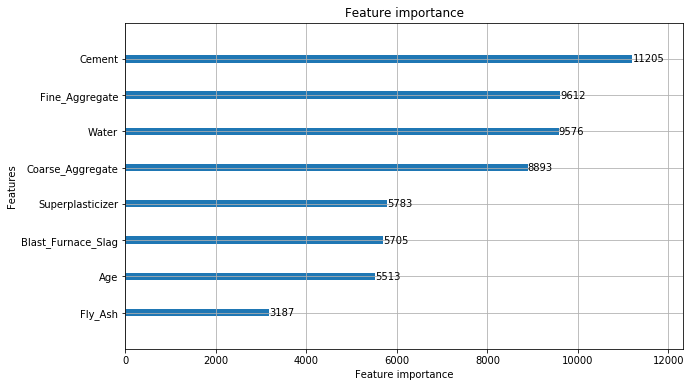

In [191]:
import matplotlib.pyplot as plt
from lightgbm import plot_importance
fig,ax = plt.subplots(figsize = (10,6))
plot_importance(model,ax=ax)

In [192]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [193]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

In [194]:
print('Raw-data Mean squared error: ', mse)
print('Raw-data R2 score: ', r2)

Raw-data Mean squared error:  15.758811090352543
Raw-data R2 score:  0.9494249339911901


In [195]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [196]:
final_result.columns = ['y_test','predict']

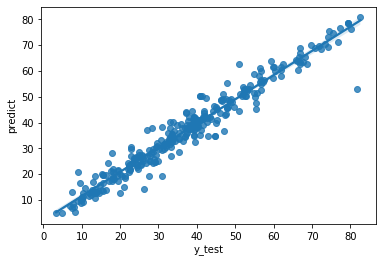

In [197]:
import seaborn as sns
sns.regplot(x = 'y_test', y = 'predict', data = final_result)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC7B0D85C8>,
      dtype=object)

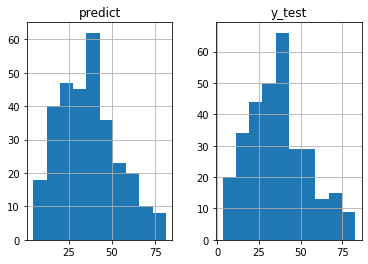

In [198]:
final_result.hist()

## Compare with log-scale data

In [199]:
y_log_trans = np.log1p(y)
x_log_trans = np.log1p(x)

In [200]:
log_x_train, log_x_test, log_y_train, log_y_test = train_test_split(x_log_trans, y_log_trans, train_size=0.7,
                                                                    test_size=0.3, random_state=142)

In [201]:
log_train_ds = lgb.Dataset(log_x_train, label = log_y_train)
log_test_ds = lgb.Dataset(log_x_test, label = log_y_test)
log_model = lgb.train(params, log_train_ds, 10000, log_test_ds, verbose_eval=100, early_stopping_rounds=100)

D:\anaconda\envs\opencv\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 0.0925127
[200]	valid_0's l2: 0.0456414
[300]	valid_0's l2: 0.031988
[400]	valid_0's l2: 0.0264405
[500]	valid_0's l2: 0.0235208
[600]	valid_0's l2: 0.0218885
[700]	valid_0's l2: 0.020773
[800]	valid_0's l2: 0.0200564
[900]	valid_0's l2: 0.0193295
[1000]	valid_0's l2: 0.0188252
[1100]	valid_0's l2: 0.0185102
[1200]	valid_0's l2: 0.0181438
[1300]	valid_0's l2: 0.0177463
[1400]	valid_0's l2: 0.017504
[1500]	valid_0's l2: 0.0172768
[1600]	valid_0's l2: 0.017072
[1700]	valid_0's l2: 0.0169393
[1800]	valid_0's l2: 0.0168567
[1900]	valid_0's l2: 0.0167061
[2000]	valid_0's l2: 0.0166429
[2100]	valid_0's l2: 0.0164827
[2200]	valid_0's l2: 0.0164183
[2300]	valid_0's l2: 0.0162648
[2400]	valid_0's l2: 0.0162528
[2500]	valid_0's l2: 0.0161819
[2600]	valid_0's l2: 0.0160937
[2700]	valid_0's l2: 0.0160792
[2800]	valid_0's l2: 0.0161178
Early stopping, best iteration is:
[2730]	valid_0's l2: 0.0160457


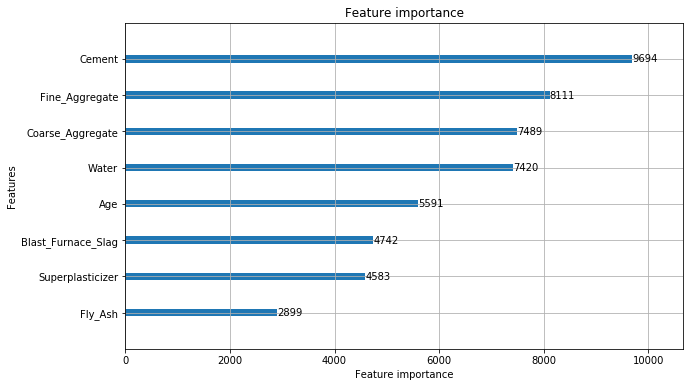

In [202]:
fig,ax = plt.subplots(figsize = (10,6))
plot_importance(log_model,ax=ax)

In [203]:
log_predict_train = log_model.predict(log_x_train)
log_predict_test = log_model.predict(log_x_test)
log_mse = mean_squared_error(log_y_test, log_predict_test)
log_r2 = r2_score(log_y_test, log_predict_test)

In [204]:
print('log-scaled data Mean squared error: ', log_mse)
print('log-scaled data R2 score: ', log_r2)

log-scaled data Mean squared error:  0.016045683547576572
log-scaled data R2 score:  0.9460204962185617


In [205]:
final_result = pd.concat([log_y_test.reset_index(drop=True), pd.DataFrame(log_predict_test)], axis = 1)

In [206]:
final_result.columns = ['log_y_test','log_predict']

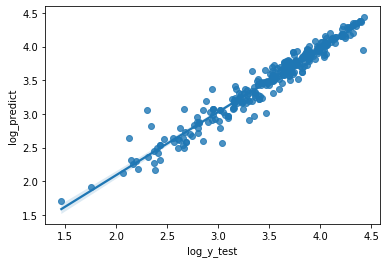

In [207]:
sns.regplot(x = 'log_y_test', y = 'log_predict', data = final_result)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC7C5200C8>,
      dtype=object)

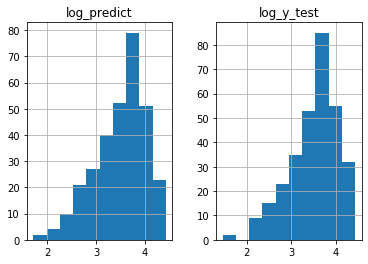

In [208]:
final_result.hist()

### Gradient boosting model

In [209]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_b = GradientBoostingRegressor(random_state=42, max_depth=16, min_samples_leaf=2,
                                  n_estimators=10000)
gbr_b

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=16,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [210]:
gbr_start = time.time()

gbr_b.fit(x_train, y_train)

print("Gradient boosting model time : ", time.time() - gbr_start)
print("Train R-squared: %.2f" %gbr_b.score(x_train,y_train) )
print("Test R-squared: %.2f" %gbr_b.score(x_test,y_test) )

Gradient boosting model time :  19.799001216888428
Train R-squared: 1.00
Test R-squared: 0.93


In [211]:
log_predict_train = log_model.predict(log_x_train)
log_predict_test = log_model.predict(log_x_test)
log_mse = mean_squared_error(log_y_test, log_predict_test)
log_r2 = r2_score(log_y_test, log_predict_test)

In [212]:
final_result = pd.concat([log_y_test.reset_index(drop=True), pd.DataFrame(log_predict_test)], axis = 1)

In [213]:
gbr_predict_train = gbr_b.predict(x_train)
gbr_predict_test = gbr_b.predict(x_test)

In [214]:
gbr_mse = mean_squared_error(y_test,gbr_predict_test)

In [215]:
gbr_r2 = r2_score(y_test,gbr_predict_test)

In [216]:
print('xgboost model Mean squared error: ', gbr_mse)
print('xgboost model R2 score: ', gbr_r2)

xgboost model Mean squared error:  21.843914325874017
xgboost model R2 score:  0.9298958910930664


### Final result


| Data-type | Model | MSE | R2 score |
|---|:---:|:---:|:---:|
| raw data | lightgbm | 15.75 | 0.949 |
| log-scale | lightgbm | 0.01 | 0.946 |
| raw data | gradient boosting | 21.84 | 0.929 |
| log-scale | linear regression | 0.053 | 0.785 |
| raw-data | linear regression | 110.488 | 0.597 |